Разбор статьи: https://zen.yandex.ru/media/id/5fd12882382a85570c79c48c/pca-v-mashinnom-obuchenii-prostymi-slovami-606dfff8ddcafc70a9616bb0

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/9t04t1haanbdvvt/bank-data-for-pca.csv?dl=1')
df

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,Длительность,Кампания,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27.0,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,5,24.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Нет
1,30.0,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,5,223.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
2,39.0,Голубой воротничок,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,5,270.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
3,42.0,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,5,103.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
4,42.0,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,5,478.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,68.0,Пенсионер,Разведен(-а),Высшая школа,Нет,Да,Нет,Сотовый телефон,Октябрь,1,222.0,1.0,0.0,Отсутствует,-1.1,94.601,-49.5,1.000,4963.0,Да
41172,68.0,Пенсионер,Разведен(-а),Высшая школа,Нет,Да,Да,Сотовый телефон,Октябрь,1,567.0,1.0,1.0,Присутствует,-1.1,94.601,-49.5,1.000,4963.0,Да
41173,74.0,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Октябрь,1,102.0,3.0,2.0,Присутствует,-1.1,94.601,-49.5,1.000,4963.0,Нет
41174,74.0,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Октябрь,1,180.0,2.0,0.0,Отсутствует,-1.1,94.601,-49.5,1.000,4963.0,Нет


Создадим список признаков, подлежащих уменьшению. Это макроэкономические показатели с невысоким уровнем важности, которые почти не попали в список выше. Выберем сокращаемые и Целевую переменные (Target Variable):

In [3]:
X = df[['Возраст', 'Длительность', 'Кампания', 'День недели', 
        'Предыдущий контакт', 'Индекс потребительских цен', 
        'Европейская межбанковская ставка','Количество сотрудников в компании']]
y = df.iloc[:, -1]

Выберем cамые важные признаки с помощью функции SelectKBest, которая использует критерий Хи-квадрат (Chi Square):

In [4]:
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)

In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(5, 'Score'))

                               Specs         Score
1                       Длительность  1.760568e+06
7  Количество сотрудников в компании  5.251380e+03
6   Европейская межбанковская ставка  3.239336e+03
4                 Предыдущий контакт  3.089714e+03
2                           Кампания  5.419261e+02


In [7]:
features = ['Колебание уровня безработицы', 'Индекс потребительских цен', 
            'Индекс потребительской уверенности', 
            'Европейская межбанковская ставка']
x = df.loc[:, features].values

In [8]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка
0,-0.11581,0.384015,0.022227,0.820856
1,-0.11581,0.384015,0.022227,0.820856
2,-0.11581,0.384015,0.022227,0.820856
3,-0.11581,0.384015,0.022227,0.820856
4,-0.11581,0.384015,0.022227,0.820856


In [9]:
pca = PCA(n_components = 1)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

principalDf.head()

,principal component 1
0,-0.614204
1,-0.614204
2,-0.614204
3,-0.614204
4,-0.614204


Разбор статьи: https://habr.com/ru/company/ods/blog/325654/

**Набор данных по цветкам ириса**

[]

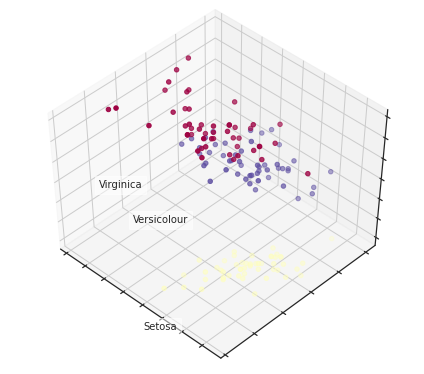

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Загрузим наши ириски
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=cm.get_cmap("Spectral"))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


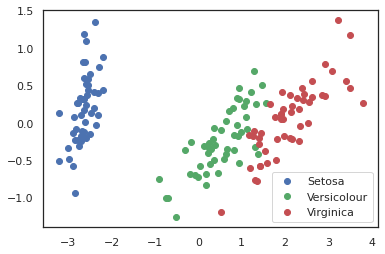

In [14]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [15]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


In [16]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


**Набор данных по рукописным цифрам**

In [17]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

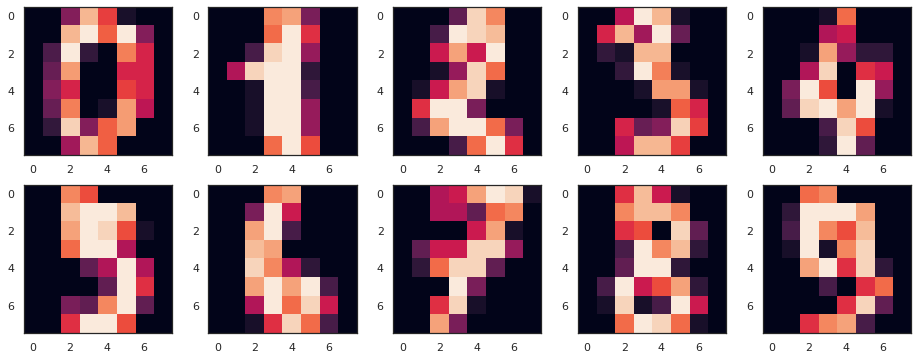

In [18]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

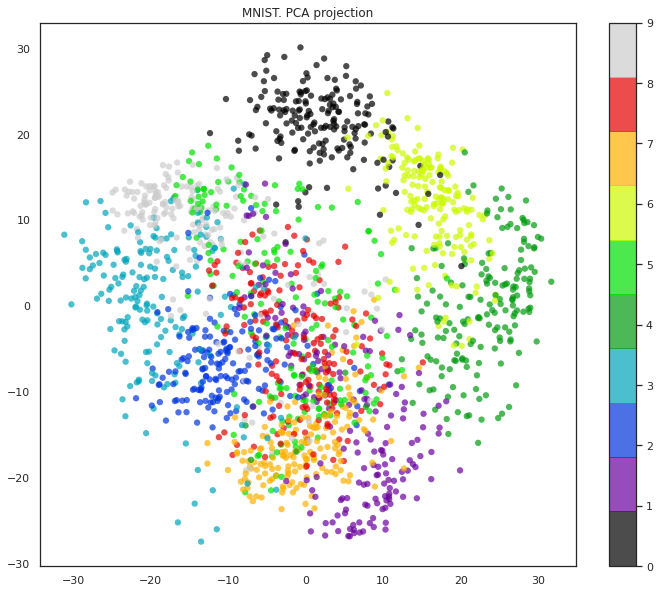

In [19]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

CPU times: user 30.9 s, sys: 82.3 ms, total: 31 s
Wall time: 24.5 s


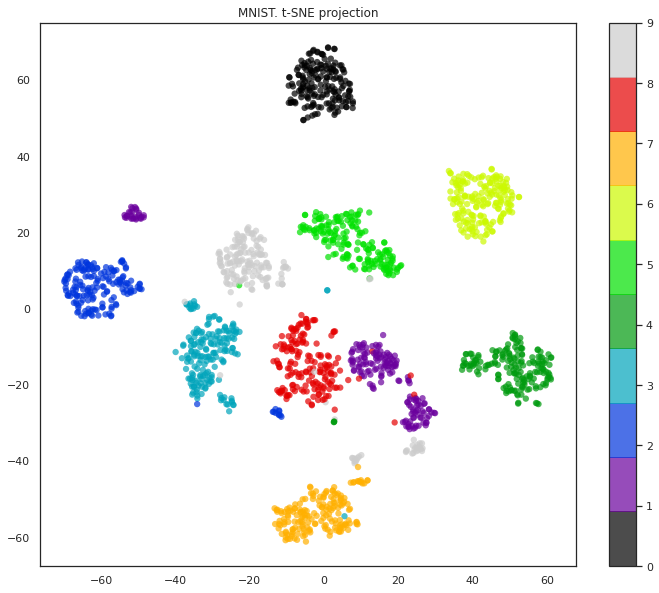

In [20]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

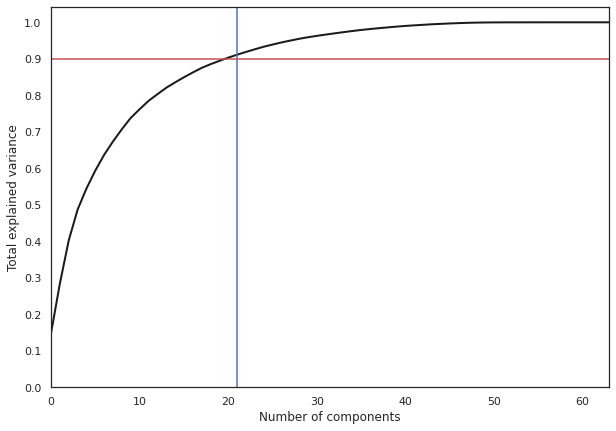

In [21]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();